### Importing Data and Getting actual Columns

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df=pd.read_csv("/home/gurupreet_singh/Documents/Upgrade_EDA/LendingClubbCaseStudy/loan.csv")

data_col_name=list(df.columns.values)
print(df.shape)

(39717, 111)


/tmp/ipykernel_1009862/3772289279.py:9: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/home/gurupreet_singh/Documents/Upgrade_EDA/LendingClubbCaseStudy/loan.csv")


### Fixing Rows and Columns

#### Fix Columns  =>  Delete Necessary Columns

In [2]:
# Deleting Columns with all NAN Values

df = df.dropna(axis=1, how='all')


#print("Shape After Dropping All Nan's===> ",df.shape)
#print("Column List After Dropping all Nan's===> ",df.columns)


In [3]:
#Deleting Irrelevant Columns

del df['collections_12_mths_ex_med'] #===> Contains all 0 , NAN values
del df['application_type'] #===> Contains only "Individual" value
del df['acc_now_delinq'] #===> Contains only 0 value
del df['chargeoff_within_12_mths'] #===> Contains only 0 or NaN
del df['pymnt_plan'] #===> Contains only n values
del df['pub_rec'] #===> Deleting this as it has only 0 values
del df['initial_list_status'] #===> Contains only record of 'f' value
del df['delinq_amnt']#===> Contains only 0 value
del df['tax_liens'] #===> This column can be deleted as it has only 0 unique values
del df['id']
del df['url']
del df['desc']
del df['policy_code'] #===> Contains only value 1




#### Remove Missing Values => Columns

In [4]:
# df['mths_since_last_record'].isnull().value_counts() # Have more than 36931 NAN values
del df['mths_since_last_record']

# df['mths_since_last_delinq'].isnull().value_counts() #===> Contains 25682 NaN values ,Hence Deleting this record
del df['mths_since_last_delinq']


df['out_prncp'].value_counts() #===> 38577/ 39717 are 0 
df['out_prncp_inv'].value_counts() #===> 38577 / 39717 are 0 


del df['out_prncp']
del df['out_prncp_inv']


df['next_pymnt_d'].isnull().value_counts() #===> 38577 / 39717 are NAN
del df['next_pymnt_d']

#### Fix Columns => Rename Column Consistency

In [5]:
df.rename(columns = {'loan_amnt':'loan_amount',
                     'funded_amnt':'funded_amount',
                     'funded_amnt_inv':'funded_amount_by_investor',
                     'emp_length':'employee_length_in_years',# cleaning => done
                     'term':'term_in_months',#cleaning => done
                     'int_rate':'interest_rate_in_%', #cleaning => done
                     'installment':'installment',#datatypeConversion => done
                     "emp_title":"employee_title",#missing Values => done
                     "home_ownership":"home_ownership",#Our values are: RENT, OWN, MORTGAGE, OTHER.
                     "annual_inc":"annual_income",#Convert float to int => done
                     "verification_status":"verification_status",# Verified,Source Verified,Not Verified
                     "issue_d":"issue_date",#Have month and Date ex: Dec-11
                     "loan_status":"loan_status", # 'Fully Paid', 'Charged Off', 'Current'
                     "purpose":"purpose",
                     "title":"loan_title",#done
                     "zip_code":"zip_code",
                     "addr_state":"address_state",
                     "dti":"dti",#Datatype conversion to  float done
                     "delinq_2yrs":"delinquency_cases_past_2yrs", # If the borrower has not paid amount past 30+ due days 
                     "earliest_cr_line":"earliest_credit_line_in_month",#cleaning
                     "inq_last_6mths":"inquries_in_6months",#excluding auto and mortgage inquiries
                     "open_acc":"no_open_credit_lines", #int
                     "revol_bal":"revolving_credit_bal",#int
                     "revol_util":"revolving_credit_utilization_in_%",#Cleaning
                     "total_acc":"total_no_credit_lines",#int
                     "total_pymnt":"total_paymnt",# convert to int
                     "total_pymnt_inv":"total_payment_by_investor",# convert to int
                     "total_rec_prncp":"total_received_principle",#convert to int
                     "total_rec_int":"total_received_interest",#covert to int
                     "total_rec_late_fee":"total_received_late_fee",#convert to int
                     "recoveries":"recoveries",#convert to int
                     "collection_recovery_fee":"collection_recovery_fee",#convert to int
                     "last_pymnt_d":"last_payment_month",#convert to date
                     "last_pymnt_amnt":"last_payment_amount",#convert to int
                     "last_credit_pull_d":"last_credit_pull_month",#convert to date
                     "pub_rec_bankruptcies":"public_record_bankruptcies"
                    }, inplace = True)



#### Fill missing values 

In [7]:
# employee_title has 2459 missing values , replaced missing values by XXX

#print(df["employee_title"].isnull().value_counts()) #should be ==> 39717

#print(df["employee_title"].unique())

df["employee_title"].fillna("XXX",inplace=True)


In [8]:

print("Before Conversoin, Null values in Column employee_length_in_years =========>\n",df["employee_length_in_years"].isnull().value_counts()) #should be ==> 39717
# employee_length_in_years has 1075 missing values , replaced missing values by median

df['employee_length_in_years']=df['employee_length_in_years'].str.extract('(\d+)', expand=False)
df['employee_length_in_years'].fillna(df['employee_length_in_years'].median(),inplace=True)
df['employee_length_in_years']=df['employee_length_in_years'].astype(int)
print("After conversion ===========>\n",df["employee_length_in_years"].isnull().value_counts())
# converting employee_length_in_years to int

Before Conversoin, Null values in Column employee_length_in_years =========>
 False    38642
True      1075
Name: employee_length_in_years, dtype: int64
After conversion ===========>
 False    39717
Name: employee_length_in_years, dtype: int64


In [9]:
df['term_in_months']=df['term_in_months'].str.extract('(\d+)', expand=False)
#extracting numbers from month
df['term_in_months']=df['term_in_months'].astype(int)

In [10]:
df['interest_rate_in_%']=df['interest_rate_in_%'].str.extract('(\d+)', expand=False)

In [11]:
#df['issue_date']

In [12]:
df["loan_title"].fillna("YYY",inplace=True)

In [13]:
df["dti"]=df["dti"].astype(float)

In [14]:
#df["earliest_credit_line_in_month"]

In [15]:
#df['public_record_bankruptcies'].fillna(df['public_record_bankruptcies'].median(), inplace=True)

In [16]:
df['last_payment_month'].fillna(df["issue_date"],inplace=True) #===> Filling 75 places of NAN in last_pymnt_d by issue_date
df['last_credit_pull_month'].fillna(df["issue_date"],inplace=True)#===> Filling 2 places of NAN in last_pymnt_d by issue_date

In [17]:
df['revolving_credit_utilization_in_%']=df['revolving_credit_utilization_in_%'].str.extract('(\d+)', expand=False)
df['revolving_credit_utilization_in_%'].fillna(df['revolving_credit_utilization_in_%'].median(),inplace=True)

In [18]:
df= df.astype({"total_paymnt":"int",
               "interest_rate_in_%":"int",
               "funded_amount_by_investor":"int",
               "total_payment_by_investor":"int",
               "total_received_principle":"int",
               "total_received_interest":"int",
              # "total_received_late_fee":"int",
              # "recoveries":"int",
              # "collection_recovery_fee":"int",
               "last_payment_amount":"int",
               "installment":"int",
               "annual_income":"int",
               "no_open_credit_lines":"int",
               "revolving_credit_bal":"int",
               "total_no_credit_lines":"int"
              })

### Standardise Values

### Filtering Data

#### Deduplicate Data

In [19]:
del df["funded_amount"] # because it is duplicate of loan_amount
del df["funded_amount_by_investor"] # because it is duplicate of loan_amount
del df["total_payment_by_investor"] # because it is duplicate of total_paymnt

In [20]:
# Dropping Irrelevalent/Non-Corelated Columns

df.drop(['inquries_in_6months',
         'member_id',
         'delinquency_cases_past_2yrs', 
         'total_received_late_fee',
         'recoveries',
         'collection_recovery_fee',
         'public_record_bankruptcies'], axis = 1, inplace = True)

#### Remove Outliers

<Axes: title={'center': 'Marks of students'}>

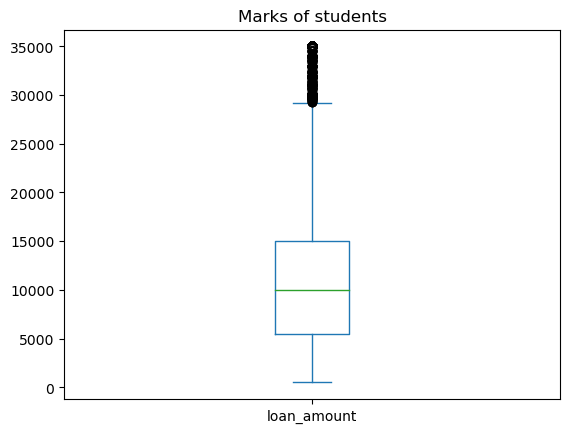

In [21]:
df['loan_amount'].plot(kind='box', title='Marks of students')

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [23]:
#cols = ['loan_amount'] # one or more
cols=["loan_amount"]
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [24]:

#fullyPaidOutlierExcluded = df[(df["loan_status"]=="Fully Paid") & (df["loan_amount"]<28540)]
#fullyPaidOutlierExcluded[fullyPaidOutlierExcluded["loan_status"]=="Fully Paid"].describe()
### For more than 6431  records have term_in_months >36 hence they are not outliers

<Axes: title={'center': 'Loan Amount'}>

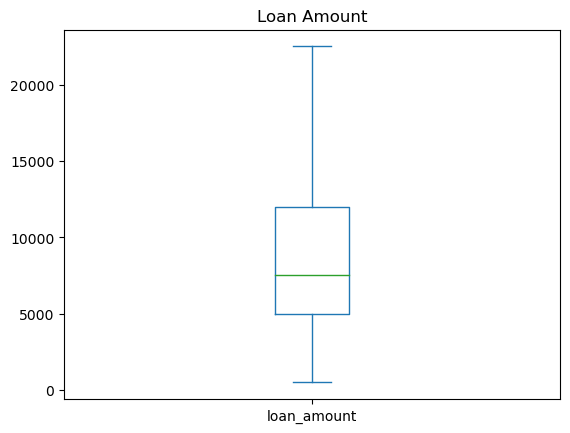

In [25]:
#df.boxplot(by ='loan_status', column =['loan_amount'], grid = False) 
df['loan_amount'].plot(kind='box', title='Loan Amount')

#### Filter Columns

#### Q] Find out the correlation between columns for Fully Paid applicants

In [26]:
fully_paid=df[df["loan_status"]=="Fully Paid"]
fully_paid.shape
# ==> Conclusions
# ==> They are taking less loan at less rate of interest for 36 term months 
# ==> There term of months are increasing but installments are decreasing ==> Good ==> Causing there Debt-to-Income to decrease
# ==> There term of months are increasing there revolving balance is decreasing
# ==> Why answer is because they have less DTI(Debt-to-Income) ==> 12.94 median


(24294, 29)

In [27]:
fully_paid.corr()

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
loan_amount,1.000000,0.102200,0.062855,0.945562,0.082980,0.301938,0.063600,0.164200,0.337143,0.186401,0.974534,0.984086,0.743854,0.226852
term_in_months,0.102200,1.000000,0.270860,-0.126166,0.047423,0.002020,0.034176,0.004753,-0.004181,0.039904,0.158843,0.081537,0.420213,0.178314
interest_rate_in_%,0.062855,0.270860,1.000000,0.103736,-0.067207,-0.049074,0.072924,-0.114695,0.059122,-0.187851,0.165638,0.076730,0.469248,0.055223
installment,0.945562,-0.126166,0.103736,1.000000,0.063369,0.291654,0.061499,0.150537,0.338115,0.153910,0.947213,0.968382,0.677893,0.182800
employee_length_in_years,0.082980,0.047423,-0.067207,0.063369,1.000000,0.180959,0.035743,0.086926,0.140118,0.211657,0.078895,0.082124,0.051031,0.031275
annual_income,0.301938,0.002020,-0.049074,0.291654,0.180959,1.000000,-0.126899,0.241999,0.318171,0.369107,0.286710,0.299353,0.181669,0.100582
dti,0.063600,0.034176,0.072924,0.061499,0.035743,-0.126899,1.000000,0.289664,0.311503,0.224406,0.076127,0.063890,0.107365,0.005346
no_open_credit_lines,0.164200,0.004753,-0.114695,0.150537,0.086926,0.241999,0.289664,1.000000,0.321806,0.663935,0.152090,0.161618,0.085729,0.048978
revolving_credit_bal,0.337143,-0.004181,0.059122,0.338115,0.140118,0.318171,0.311503,0.321806,1.000000,0.304051,0.335554,0.334204,0.273779,0.050593
total_no_credit_lines,0.186401,0.039904,-0.187851,0.153910,0.211657,0.369107,0.224406,0.663935,0.304051,1.000000,0.162820,0.181462,0.059830,0.106815


In [28]:
print("fully_paid ==> Median of DTI ==>",fully_paid["dti"].median())

fully_paid ==> Median of DTI ==> 12.9


In [29]:
fully_paid.describe()

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
count,24294.000000,24294.000000,24294.000000,24294.000000,24294.000000,24294.000000,24294.000000,24294.000000,24294.000000,24294.000000,24294.000000,24294.000000,24294.000000,24294.000000
mean,8247.279164,39.283774,10.459249,252.838602,4.719272,56841.030007,12.924954,8.669054,9023.056804,19.970034,9573.639417,8124.458920,1448.323454,1567.965177
std,4632.853419,8.248042,3.314167,146.064760,3.271176,26316.154512,6.697155,3.907490,7803.960560,10.084515,5479.156773,4523.781228,1193.504598,1962.992865
min,500.000000,36.000000,5.000000,15.000000,1.000000,4000.000000,0.000000,2.000000,0.000000,2.000000,526.000000,500.000000,6.000000,0.000000
25%,4950.000000,36.000000,7.000000,146.000000,2.000000,37500.000000,7.710000,6.000000,2962.000000,12.000000,5477.250000,4800.000000,580.000000,207.000000
50%,7500.000000,36.000000,10.000000,224.000000,4.000000,52000.000000,12.900000,8.000000,6999.000000,18.000000,8506.000000,7200.000000,1087.000000,503.000000
75%,11000.000000,36.000000,13.000000,332.000000,7.000000,72000.000000,18.180000,11.000000,13048.750000,26.000000,12926.000000,10775.000000,1977.000000,2444.750000
max,22500.000000,60.000000,21.000000,786.000000,10.000000,145008.000000,29.990000,21.000000,37077.000000,53.000000,28145.000000,22500.000000,6087.000000,7905.000000


In [30]:
f=fully_paid[['home_ownership','verification_status','grade','sub_grade']]
f.describe()

,home_ownership,verification_status,grade,sub_grade
count,24294,24294,24294,24294
unique,5,3,7,35
top,RENT,Not Verified,A,A4
freq,12848,12429,7986,2237


In [31]:
fb=fully_paid[(fully_paid["grade"]=="A") & (fully_paid["sub_grade"]=="A4")]
#print("Employee Length==>",fb['employee_length_in_years'].median(),"\n")
#print("Home_Ownership",fb['home_ownership'].value_counts(),"\n")
#print("Verification_status",fb['verification_status'].value_counts(),"\n")
print("Average DTI",fb['dti'].median(),"\n")

fb.corr()

Average DTI 12.0 



,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
loan_amount,1.000000,0.055569,-0.177986,0.943566,0.152853,0.290688,0.020725,0.145104,0.301066,0.194908,0.962823,0.964256,0.860948,0.199936
term_in_months,0.055569,1.000000,-0.132689,-0.142554,0.090448,0.009115,0.004468,0.052045,0.007680,0.087504,0.002119,-0.015357,0.136025,0.036996
interest_rate_in_%,-0.177986,-0.132689,1.000000,-0.081527,-0.031352,-0.060938,-0.085734,0.007667,-0.077476,0.007229,-0.104612,-0.115635,-0.010698,-0.043500
installment,0.943566,-0.142554,-0.081527,1.000000,0.141794,0.278653,0.020417,0.131962,0.287427,0.180013,0.985947,0.989851,0.862923,0.180639
employee_length_in_years,0.152853,0.090448,-0.031352,0.141794,1.000000,0.158969,0.018612,0.082727,0.184386,0.186252,0.157772,0.155581,0.159741,0.006245
annual_income,0.290688,0.009115,-0.060938,0.278653,0.158969,1.000000,-0.165171,0.202207,0.288421,0.330862,0.278703,0.282680,0.222311,0.089696
dti,0.020725,0.004468,-0.085734,0.020417,0.018612,-0.165171,1.000000,0.294382,0.275414,0.235914,0.024711,0.022638,0.038090,-0.025554
no_open_credit_lines,0.145104,0.052045,0.007667,0.131962,0.082727,0.202207,0.294382,1.000000,0.287989,0.657081,0.138506,0.138169,0.128125,0.054987
revolving_credit_bal,0.301066,0.007680,-0.077476,0.287427,0.184386,0.288421,0.275414,0.287989,1.000000,0.288430,0.294103,0.291278,0.288238,0.019148
total_no_credit_lines,0.194908,0.087504,0.007229,0.180013,0.186252,0.330862,0.235914,0.657081,0.288430,1.000000,0.188989,0.190497,0.159694,0.114813


#### Observation:- Factors due to which Individual is likely to fully pay the LOAN
| Findings | Ideal Situation | Explanation |
| :- | -: | :-: |
| 1. Terms_in_month is inversely proportional to Installments  | Yes | As number of Term months are completing the installment are reducing, That means they are paying installments on Time |
| 2. Relative Terms_in_months is 36 months | Yes | For 36 months they are paying 13% interest which is one of the factors to succeed |
| 3. Median of DTI is 12.0 | Yes | Individual is able to manage Debit to Income ratio |
| 4. Loan Amount is Comparatively Low (mean :- 8482)| Yes | Less Loan amount is easy to pay back |
| 5. Grade A of Sub Grade A4 is the best Grade | Yes | |


#### Q] Find out the correlation between columns for Charged Off applicants

In [32]:
least_paid=df[(df["loan_status"]=="Charged Off") ]

# ==> Observations
# ==> They are taking more loan at higher rate of interest for 60 term months 
# ==> There term of months are increasing but installments are not decreasing Why?
# ==> Why answer is because they have more DTI(Debt-to-Income)==Median 15.0

In [33]:
print("least_paid ==> Median of DTI ==>",least_paid["dti"].median())

least_paid ==> Median of DTI ==> 14.03


In [34]:
least_paid.corr()

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
loan_amount,1.000000,0.297419,0.191621,0.918388,0.139825,0.342136,0.077549,0.188737,0.313753,0.247939,0.613634,0.495737,0.655420,0.393530
term_in_months,0.297419,1.000000,0.392778,-0.008036,0.097443,0.059862,0.043132,0.057247,0.058402,0.096820,0.140285,-0.033240,0.450411,-0.013724
interest_rate_in_%,0.191621,0.392778,1.000000,0.170297,-0.004800,0.061813,0.004022,-0.063274,0.026888,-0.116855,0.077772,-0.094618,0.377332,0.056163
installment,0.918388,-0.008036,0.170297,1.000000,0.115485,0.343363,0.050784,0.161736,0.293686,0.196903,0.606884,0.534954,0.552258,0.433340
employee_length_in_years,0.139825,0.097443,-0.004800,0.115485,1.000000,0.193758,0.054734,0.086503,0.147708,0.169448,0.103957,0.090831,0.128694,0.027101
annual_income,0.342136,0.059862,0.061813,0.343363,0.193758,1.000000,-0.071983,0.267326,0.343440,0.360363,0.249945,0.209167,0.229054,0.152407
dti,0.077549,0.043132,0.004022,0.050784,0.054734,-0.071983,1.000000,0.310021,0.325799,0.275399,0.039412,0.014183,0.066410,0.014139
no_open_credit_lines,0.188737,0.057247,-0.063274,0.161736,0.086503,0.267326,0.310021,1.000000,0.365090,0.655730,0.125563,0.117581,0.120513,0.072093
revolving_credit_bal,0.313753,0.058402,0.026888,0.293686,0.147708,0.343440,0.325799,0.365090,1.000000,0.373001,0.171986,0.139536,0.175584,0.113850
total_no_credit_lines,0.247939,0.096820,-0.116855,0.196903,0.169448,0.360363,0.275399,0.655730,0.373001,1.000000,0.142084,0.117536,0.141419,0.078037


In [35]:
least_paid.describe()

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
count,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,9302.148618,44.610138,12.671429,267.517742,4.853917,51046.691935,13.789599,8.552304,9447.067742,19.387558,5024.581336,3119.454378,1438.923733,260.219124
std,5314.037841,11.512575,3.413483,152.645081,3.295866,23867.017448,6.645526,3.986990,7989.128062,10.140840,4077.240164,2813.315452,1310.663983,296.952024
min,900.000000,36.000000,5.000000,22.000000,1.000000,4080.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,36.000000,10.000000,152.000000,2.000000,35000.000000,8.807500,6.000000,3245.500000,12.000000,1861.750000,1036.500000,469.000000,104.000000
50%,8400.000000,36.000000,13.000000,245.000000,4.000000,47496.000000,14.030000,8.000000,7422.500000,18.000000,3978.500000,2323.500000,1009.500000,209.000000
75%,13000.000000,60.000000,15.000000,358.000000,8.000000,63606.000000,19.150000,11.000000,13663.750000,26.000000,7104.250000,4431.000000,2035.250000,342.000000
max,22500.000000,60.000000,21.000000,815.000000,10.000000,144000.000000,29.850000,21.000000,36934.000000,53.000000,26701.000000,19332.000000,6084.000000,6309.000000


In [36]:
l=least_paid[['home_ownership','verification_status','grade','sub_grade']]
l.describe()

,home_ownership,verification_status,grade,sub_grade
count,4340,4340,4340,4340
unique,4,3,7,35
top,RENT,Not Verified,B,B5
freq,2400,1910,1204,296


In [37]:
lb=least_paid[(least_paid["grade"]=="B") & (least_paid["sub_grade"]=="B5")]
#print("Employee Length==>",lb['employee_length_in_years'].median(),"\n")
#print("Home_Ownership",lb['home_ownership'].value_counts(),"\n")
#print("Verification_status",lb['verification_status'].value_counts(),"\n")

lb.corr()

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
loan_amount,1.000000,0.399982,0.015728,0.889048,0.027460,0.298730,-0.008476,0.091237,0.263677,0.252018,0.629234,0.555020,0.723319,0.541668
term_in_months,0.399982,1.000000,-0.153601,0.013998,0.055911,0.070958,0.025201,-0.006516,0.035348,0.190932,0.237662,0.129802,0.476016,-0.025510
interest_rate_in_%,0.015728,-0.153601,1.000000,0.117675,-0.027005,-0.029487,0.115028,0.098411,0.086083,0.036103,0.026793,-0.008005,0.008103,0.112771
installment,0.889048,0.013998,0.117675,1.000000,0.011647,0.304758,-0.030459,0.092019,0.259452,0.167830,0.588568,0.554435,0.576688,0.631770
employee_length_in_years,0.027460,0.055911,-0.027005,0.011647,1.000000,0.134314,-0.048488,0.051296,0.015801,0.118125,0.036383,0.022070,0.070627,-0.000884
annual_income,0.298730,0.070958,-0.029487,0.304758,0.134314,1.000000,-0.192772,0.166089,0.296689,0.258383,0.315514,0.287643,0.301680,0.208981
dti,-0.008476,0.025201,0.115028,-0.030459,-0.048488,-0.192772,1.000000,0.280378,0.321445,0.214909,-0.037990,-0.042328,-0.012764,-0.064944
no_open_credit_lines,0.091237,-0.006516,0.098411,0.092019,0.051296,0.166089,0.280378,1.000000,0.268027,0.602178,0.110998,0.102284,0.117050,0.049112
revolving_credit_bal,0.263677,0.035348,0.086083,0.259452,0.015801,0.296689,0.321445,0.268027,1.000000,0.306232,0.157407,0.118233,0.149214,0.098969
total_no_credit_lines,0.252018,0.190932,0.036103,0.167830,0.118125,0.258383,0.214909,0.602178,0.306232,1.000000,0.168636,0.112158,0.227339,0.108014


#### Observations:-
| Findings | Ideal Situation | Explanation |
| :- | -: | :-: |
| 1. Terms_in_month is proportional to Installments  | NO | As number of Term months are completing the installment are not reducing, Means Individuals are not Paying installments on Time |
| 2. Relative Terms_in_months is 60 months | NO | For 60 months they are paying 15% interest rate which is one of the factors to default |
| 3. Median of DTI is 14.06 | Likely NO | Individual may not be able to manage Debit to Income ratio |
| 4. Loan Amount Taken is more (mean :- 9907)  | Likey NO | Big Loan amounts hard to pay back |
| 5. Grade B of Sub-Grade B5 is the most frequent type and most likely to default | Likely NO | Installment is negatively proportioanl to DTI , Most probably they are left with no income after installment or They are paying installment by taking some other loan 2. More Loan applicants are form this Sub-grade |

#### Top 20 States with Fully Paid Applicants - Univariate Analysis

<Axes: >

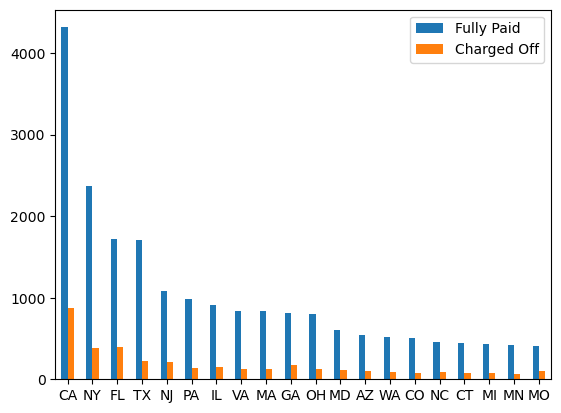

In [38]:
fully_paid_df = fully_paid['address_state'].value_counts().rename_axis('states').reset_index(name='fully_paid_freq')
charged_off_df = least_paid['address_state'].value_counts().rename_axis('states').reset_index(name='least_paid_freq')
merged_df = pd.merge(fully_paid_df, charged_off_df, on='states')

fully_paid_freq_arr = merged_df["fully_paid_freq"]
least_paid_freq_arr = merged_df["least_paid_freq"]
index = merged_df['states']

state_df = pd.DataFrame({'Fully Paid': np.array(fully_paid_freq_arr),
                   'Charged Off': np.array(least_paid_freq_arr)},
                  index=np.array(index))
state_df[:20].plot.bar(rot=0)

####  Observation => From the Graph above "CA" is the state which has largest number of Applicants and Fully Paid Applicants

<Axes: >

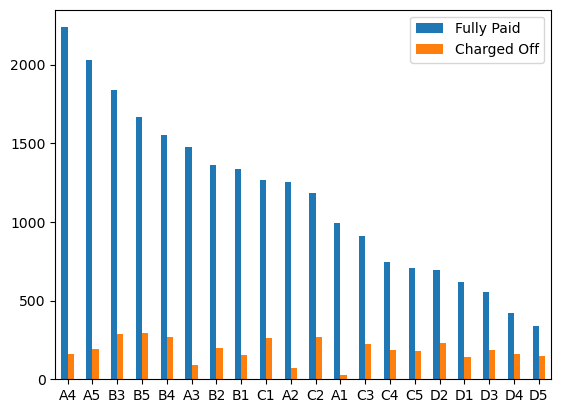

In [39]:
fp_sub_grade=fully_paid["sub_grade"].value_counts().rename_axis('sub_grade').reset_index(name='fully_paid_freq')
charged_off_sub_grade = least_paid['sub_grade'].value_counts().rename_axis('sub_grade').reset_index(name='least_paid_freq')

merged_df = pd.merge(fp_sub_grade, charged_off_sub_grade, on='sub_grade')
merged_df['success_percent'] = (merged_df["fully_paid_freq"] / (merged_df["fully_paid_freq"] + merged_df["least_paid_freq"])*100)

fully_paid_freq_arr = merged_df["fully_paid_freq"]
least_paid_freq_arr = merged_df["least_paid_freq"]
index = merged_df['sub_grade']

new_df = pd.DataFrame({'Fully Paid': np.array(fully_paid_freq_arr),
                   'Charged Off': np.array(least_paid_freq_arr)},
                  index=np.array(index))

new_df[:20].plot.bar(rot=0)

In [40]:
def risk_fuction(percen):
    if(percen>90):
        return "No Risk"
    elif (percen>70):
        return "Good"
    elif (percen>55):
        return "Average Can be Considered"
    else:
        return "Reject"
    
merged_df['risk_factor']=merged_df["success_percent"].apply(risk_fuction) # Driven Columns
merged_df.sort_values(by="success_percent", ascending=False)

,sub_grade,fully_paid_freq,least_paid_freq,success_percent,risk_factor
11,A1,990,28,97.249509,No Risk
9,A2,1253,71,94.637462,No Risk
5,A3,1476,91,94.192725,No Risk
0,A4,2237,160,93.324990,No Risk
1,A5,2030,192,91.359136,No Risk
7,B1,1334,155,89.590329,Good
6,B2,1361,199,87.243590,Good
2,B3,1836,286,86.522149,Good
4,B4,1554,268,85.290889,Good
3,B5,1669,296,84.936387,Good


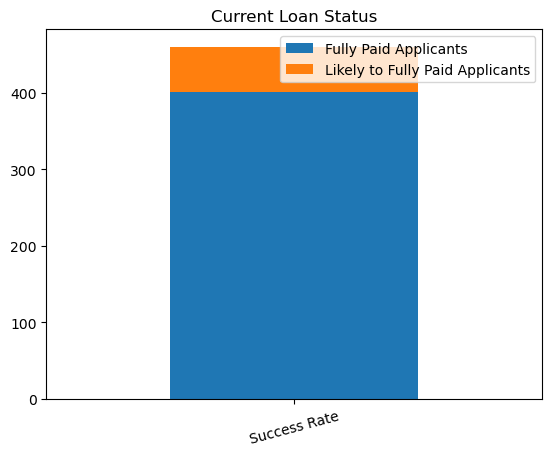

In [43]:
df["loan_status"].unique()
current_df=df[(df["loan_status"]=="Current")]
current_df.shape # 497 records of Current


#print(current_df["sub_grade"].value_counts())
current_cnt_df=current_df["sub_grade"].value_counts().rename_axis('sub_grade').reset_index(name='Count')
#["D5","E1","E2","E3","E4","E5","F1","F2","F3","F4"]
#current_df.groupby(["sub_grade"]).sum()
current_merged_df = pd.merge(current_cnt_df, merged_df, on='sub_grade' , how="left")


good=current_merged_df[current_merged_df['risk_factor']=="Good"]
#print("Good===>",good['Count'].sum())

Average=current_merged_df[current_merged_df['risk_factor']=="Average Can be Considered"]
#print("Average===>",Average['Count'].sum())


Reject=current_merged_df[current_merged_df['risk_factor']=="Reject"]
#print("Reject===>",Reject['Count'].sum())

# A python dictionary

data = {"Fully Paid Applicants":[good['Count'].sum()],

        "Likely to Fully Paid Applicants":[Average['Count'].sum()]

        };

index     = ["Success Rate"];


# Dictionary loaded into a DataFrame

dataFrame = pd.DataFrame(data=data, index=index);

 

# Draw a vertical bar chart

dataFrame.plot.bar(stacked=True,rot=15, title="Current Loan Status");

#plot.show(block=True);

#### Observations:-
| Findings | Risk |
| :- | :-: |
| Out of 450 Loan Applicants 401 applications follow in Good Category | 4% to 5% like to Charge Off |
| Out of 450 , 59 Applicants are of Average Category | 30% likely to Charge off |